## Issues with RSSI

RSSI was used in activity detection but had few issues.

As RSSI uses signal strength, which is never consistent, temp, humid, air pressure. Signals transmitted by router is never consistent.


If we use a MIMO system, and we have multiple antenna on a receiver then, each receiver receives the same packet. In OFDM, 56 subcarriers(we have access to 30 subcarriers, why?). Same packet is being transmitted by Antenna 1 of transmitter and received by Antenna 1...n of the receiver. 

How to figure out the CSI of transmitter packet. 
- CSI data comes from the physical layer of your device/router and hence the signal is relatively consistent.
- Impact of external factors 

CSI ma amplitude ra phase information huncha. Say transmitter bata suru bhayo, it has amp and phase info. Impact gets impacted by obstruction/multipath, fading. Phase is noisy.

This can be seen by y=Hx+n where, y is the received signal, x is the transmitted signal, n is the noise which got added to the signal. H is 

3 antenna each in transmitter and receiver. For each tx, rx pair, 9 pairs. Each packet that is txed has 30 subcarrier, so we get information of the same packet from 30 subcarrier. h_i is the CSI of that packet for that tx pair. To get entire CSI for a single packet for MIMO of 3x3.  For n packets 3x3xn matrix.


 packet sent by 

very antenna receives sends the same 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Program

In [168]:
activity = pd.read_csv("data/personDoingNormalActivity.csv")
no_activity = pd.read_csv("data/noPersonFanRunning.csv")
position1 = pd.read_csv("data/log.console_test.position1.csv")

In [169]:
print("Number of columns: ", len(activity.columns))
activity.columns

Number of columns:  26


Index(['type', 'role', 'mac', 'rssi', 'rate', 'sig_mode', 'mcs', 'bandwidth',
       'smoothing', 'not_sounding', 'aggregation', 'stbc', 'fec_coding', 'sgi',
       'noise_floor', 'ampdu_cnt', 'channel', 'secondary_channel',
       'local_timestamp', 'ant', 'sig_len', 'rx_state', 'real_time_set',
       'real_timestamp', 'len', 'CSI_DATA'],
      dtype='object')

In [170]:
activity.head()["fec_coding"]

0    0
1    0
2    0
3    0
4    0
Name: fec_coding, dtype: int64

In [171]:
# No of columns with two or more values
exclude_cols = [len(activity[col].value_counts())<2 for col in activity.columns]
sum(exclude_cols)

16

In [172]:
select_cols = list(~pd.Series(exclude_cols))
activity.loc[:, select_cols]

rssi  mcs  stbc  sgi  noise_floor  ampdu_cnt  local_timestamp  \
0      -50    4     0    0          -98          1          6317181   
1      -49    4     1    0          -98          1          6573583   
2      -50    4     1    0          -98          1          9403668   
3      -49    4     1    0          -98          1         12439010   
4      -49    5     1    0          -98          1         12579050   
...    ...  ...   ...  ...          ...        ...              ...   
1892   -47    7     1    1          -97          1       2452894671   
1893   -47    7     1    1          -97          1       2452933114   
1894   -48    7     1    1          -97          1       2455477523   
1895   -52    7     1    1          -97          1       2457638456   
1896   -53    7     1    1          -97          1       2461254758   

      real_timestamp  len                                           CSI_DATA  
0            6.71656  256  [-106 -32 8 0 11 23 12 22 12 21 12 20 14 19 14...  
1            6.97191  384  [-106 -32 8 0 -2 8 -4 7 -6 8 -7 8 -8 10 -8 11 ...  
2            9.80248  384  [-106 -32 8 0 -6 -5 -4 -9 -3 -14 -4 -17 -4 -19...  
3           12.83740  384  [-106 -32 8 0 -7 -3 -6 -8 -6 -13 -7 -16 -8 -19...  
4           12.97740  384  [-106 -32 8 0 -6 -5 -4 -9 -3 -13 -3 -17 -2 -20...  
...              ...  ...                                                ...  
1892      2453.29000  384  [-106 -32 8 0 6 -10 10 -10 14 -12 17 -13 19 -1...  
1893      2453.40000  384  [-106 -32 8 0 -12 1 -15 -2 -19 -4 -22 -5 -25 -...  
1894      2455.88000  384  [-106 -32 8 0 -2 -12 -1 -16 0 -20 0 -23 -2 -26...  
1895      2458.04000  384  [-106 -32 8 0 20 -8 23 -10 25 -11 26 -13 26 -1...  
1896      2461.65000  384  [-106 -32 8 0 -19 13 -24 17 -27 21 -28 24 -29 ...  

[1897 rows x 10 columns]

In [173]:
diffs = np.diff(activity["local_timestamp"])
print(np.max(diffs), np.min(diffs))

11788910 129


In [174]:
activity.columns

Index(['type', 'role', 'mac', 'rssi', 'rate', 'sig_mode', 'mcs', 'bandwidth',
       'smoothing', 'not_sounding', 'aggregation', 'stbc', 'fec_coding', 'sgi',
       'noise_floor', 'ampdu_cnt', 'channel', 'secondary_channel',
       'local_timestamp', 'ant', 'sig_len', 'rx_state', 'real_time_set',
       'real_timestamp', 'len', 'CSI_DATA'],
      dtype='object')

In [196]:
# Filter out the 256 items rows i.e. stbc==0
activity_stbc = activity[activity['stbc']==1]

In [197]:
activity["rate"]

0       11
1       11
2       11
3       11
4       11
        ..
1892    11
1893    11
1894    11
1895    11
1896    11
Name: rate, Length: 1897, dtype: int64

11.788909999999987 0.0001289999999585234 1.294798300105485 1.6533945835055643


(array([1.169e+03, 1.680e+02, 4.550e+02, 1.400e+01, 4.700e+01, 2.900e+01,
        2.000e+00, 6.000e+00, 1.000e+00, 5.000e+00]),
 array([1.29000000e-04, 1.17900710e+00, 2.35788520e+00, 3.53676330e+00,
        4.71564140e+00, 5.89451950e+00, 7.07339760e+00, 8.25227570e+00,
        9.43115380e+00, 1.06100319e+01, 1.17889100e+01]),
 <BarContainer object of 10 artists>)

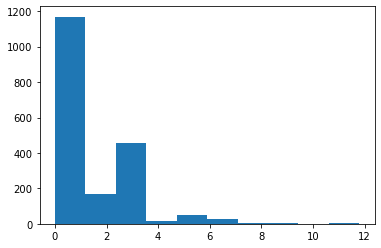

In [198]:
diffs = np.diff(activity["local_timestamp"]/1000000)
print(np.max(diffs),np.min(diffs),np.mean(diffs),np.std(diffs))

plt.hist(diffs)

In [199]:
print(np.mean(diffs), np.std(diffs))

1.294798300105485 1.6533945835055643


(array([1.178e+03, 2.040e+02, 4.100e+02, 1.500e+01, 4.900e+01, 2.600e+01,
        2.000e+00, 6.000e+00, 1.000e+00, 5.000e+00]),
 array([ 0.08 ,  1.248,  2.416,  3.584,  4.752,  5.92 ,  7.088,  8.256,
         9.424, 10.592, 11.76 ]),
 <BarContainer object of 10 artists>)

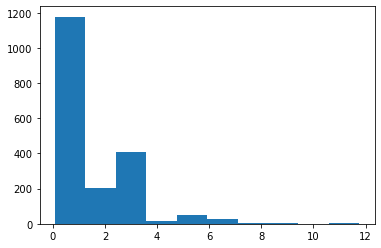

In [200]:
import numpy as np
import matplotlib.pyplot as plt

plt.hist(np.diff(activity["real_timestamp"]))

In [201]:
activity["CSI_DATA"]

0       [-106 -32 8 0 11 23 12 22 12 21 12 20 14 19 14...
1       [-106 -32 8 0 -2 8 -4 7 -6 8 -7 8 -8 10 -8 11 ...
2       [-106 -32 8 0 -6 -5 -4 -9 -3 -14 -4 -17 -4 -19...
3       [-106 -32 8 0 -7 -3 -6 -8 -6 -13 -7 -16 -8 -19...
4       [-106 -32 8 0 -6 -5 -4 -9 -3 -13 -3 -17 -2 -20...
                              ...                        
1892    [-106 -32 8 0 6 -10 10 -10 14 -12 17 -13 19 -1...
1893    [-106 -32 8 0 -12 1 -15 -2 -19 -4 -22 -5 -25 -...
1894    [-106 -32 8 0 -2 -12 -1 -16 0 -20 0 -23 -2 -26...
1895    [-106 -32 8 0 20 -8 23 -10 25 -11 26 -13 26 -1...
1896    [-106 -32 8 0 -19 13 -24 17 -27 21 -28 24 -29 ...
Name: CSI_DATA, Length: 1897, dtype: object

In [202]:
activity["bandwidth"]

0       0
1       0
2       0
3       0
4       0
       ..
1892    0
1893    0
1894    0
1895    0
1896    0
Name: bandwidth, Length: 1897, dtype: int64

### CSI

Channel state information (CSI) refers to the channel information of a Wi-Fi connection.
- In ESP32, this information consists of channel frequency responses of sub-carriers and is estimated when packets are received from the transmitter. 
- Each channel frequency response of sub-carrier is recorded by two bytes of signed characters.
- The first one is imaginary part and the second one is real part.
- There are up to three fields of channel frequency responses according to the type of received packet.
  - legacy long training field (LLTF), 
  - high throughput LTF (HT-LTF), and 
  - space time block code HT-LTF (STBC-HT-LTF). 
- For different types of packets which are received on channels with different state, the sub-carrier index and total bytes of signed characters of CSI are shown in the following table.

|        Channel     | Secondary Channel |  None   |         |      |
|:------------------:|:-----------------:|:-------:|:-------:|:-----|
| Packet Information | Signal Mode       | non HT  |  HT            |
|                    | Channel Bandwidth | 20MHz   | 20 MHz         |
|                    | STBC              | non STBC   | non STBC| STBC |
|Sub-carrier index   | LLTF              |    0 ~ 31, -32 ~ -1 |0 ~ 31, -32 ~ -1|0to31, -32to-1     |
|                    | HT-LTF            |-  | 0 ~ 31, -32 ~ -1  |0to31, -32to-1   |
|                    | STBC-HT-LTF       | -| -|0to31, -32to-1    |
|                    | Total bytes       | 128     |  256    |  384 |



384 bytes represents 64 subcarrier's Imag+Real part for LLTF, HT-LTF and STBC-HT-LTF.

In [ ]:
activity["sig_mode"].unique()    # 1 represents High Throughput(HT)

In [ ]:
activity["bandwidth"].unique()  # 0 represents 20MHz bandwidth

In [ ]:
activity["secondary_channel"].unique()  # 0 represents No secondary channel

In [ ]:
activity[activity["stbc"]==0]  # 0 represents non STBC

The first data and 305th data don't have STBC(Space Time Block Code) so, they are of 256 bytes.
While rest are of 384 bytes.

### CSI Data Exploration

In [203]:
activity["CSI_DATA"][10]

'[-106 -32 8 0 -6 -1 -4 -6 -3 -11 -3 -16 -4 -20 -5 -24 -6 -26 -9 -27 -9 -27 -10 -26 -11 -25 -10 -21 -9 -18 -7 -14 -4 -10 -2 -6 2 -3 6 0 9 3 12 6 14 8 16 9 17 11 18 11 17 12 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 18 -2 23 -1 26 -1 30 0 30 0 32 0 31 0 29 1 25 1 21 2 16 2 10 3 4 3 -3 5 -9 6 -14 8 -20 10 -22 12 -25 15 -25 17 -27 19 -26 21 -24 20 -22 19 -19 18 -14 14 -77 0 -16 9 -16 9 -15 9 -15 10 -14 9 -14 10 -13 10 -12 10 -12 10 -12 10 -12 10 -11 10 -11 10 -11 10 -11 10 -11 10 -11 10 -11 9 -11 9 -11 8 -11 7 -11 7 -11 7 -11 6 -11 5 -11 4 -11 4 -11 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 -5 13 -7 13 -9 13 -10 12 -11 11 -12 11 -12 11 -13 11 -14 11 -15 10 -16 10 -17 8 -17 8 -17 8 -17 7 -17 7 -18 6 -18 7 -17 7 -17 7 -17 7 -17 8 -17 9 -17 8 -17 8 -16 8 -17 9 -16 9 -77 0 12 3 12 3 12 3 12 3 11 3 11 2 11 1 11 1 11 0 12 0 11 0 11 0 11 0 10 0 10 0 10 0 11 0 10 0 11 0 10 0 10 0 9 1 9 1 9 1 8 1 8 1 8 3 7 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 12 -4 12 -2 12 -1 13 0 13 1 13 2 13 2 13 3 13 4 14 5 13 6 13 6 12 6 12 7

In [204]:
str='112 -128 6 0 0 0 0 0 0 0 0 0 3 9 2 10 1 12 0 14 1 14 1 16 2 16 3 16 3 16 4 15 5 15 5 14 5 13 4 12 2 11 1 11 0 11 -1 11 -2 12 -3 13 -3 14 -3 15 -2 16 -1 17 0 17 1 17 0 0 2 15 2 14 2 14 1 12 0 12 -1 12 -2 12 -4 12 -4 13 -4 15 -4 16 -4 17 -3 18 -3 19 -1 19 0 19 1 18 2 17 1 16 2 15 0 14 -1 14 -2 13 -3 14 -4 15 -6 16 0 0 0 0 0 0 0 0 0 0'
vals = str.split(' ')
print(len(vals))

128


### Parameters

#### sig_mode

- 0: non HT(11bg) packet;
- 1: HT(11n) packet;
- 3: VHT(11ac) packet

#### mcs: Modulation Coding Scheme
If is HT(11n) packet, shows the modulation, range from 0 to 76(MSC0 ~ MCS76)

#### bandwidth: Channel Bandwidth of the packet. 
- 0: 20MHz
- 1: 40MHz


#### aggregation
Aggregation. 
- 0: MPDU packet
- 1: AMPDU packet
    
#### stbc
Space Time Block Code(STBC) 
- O: non STBC packet
- 1: STBC packet
        
#### fec_coding (Forward Error Correction)
Flag is set for 11n packets which are LDPC(low density parity check)

#### sgi
Short Guide Interval(SGI)
- 0: Long GI
- 1: Short GI

#### noise_floor
noise floor of Radio Frequency Module(RF). unit: dBm
    
#### channel
primary channel on which this packet is received


#### secondary_channel 
secondary channel on which this packet is received. 
- 0: none
- 1: above
- 2: below

#### timestamp
The local time when this packet is received. It is precise only if modem sleep or light sleep is not enabled. 
- unit: microsecond
    
#### ant (antenna number)
antenna numberfrom which this packet is received.
- 0: WiFi antenna 0
- 1: WiFi antenna 1

#### sig_len
length of packet including Frame Check Sequence(FCS)

#### rx_state
state of the packet.
- 0: no error 
- others: error numbers which are not public

#### len
length of CSI data


'mcs', 'bandwidth',
       'smoothing', 'not_sounding', 'aggregation', 'stbc', 'fec_coding', 'sgi',
       'noise_floor', 'ampdu_cnt', 'channel', 'secondary_channel',
       'local_timestamp', 'ant', 'sig_len', 'rx_state', 'real_time_set',
       'real_timestamp', 'len', 

### Wireless Signal Strength and Noise Levels


#### RSSI 
Received Signal Strength Indicator (RSSI) is a measurement of the power present in a received radio signal. 
- The RSSI is indicated by a negative dBm value. This value relates to the signal strength of the cellular signal from the tower to the modem. 
- The higher the number, the better the signal. The exact numbers vary between cellular carriers. 
-  However, -70 dBm and higher values usually equate to the modem being in an excellent coverage area. 
- The closer to 0 dBm, the stronger the signal.
- The RSSI is a relative value. Its measurement depends on the receiving device. 

|        RSSI        | Signal strength |                                                  Description                                                 |   |
|:------------------:|:---------------:|:------------------------------------------------------------------------------------------------------------:|---|
| > -65 dBm          | Excellent       | Strong signal with maximum data speeds                                                                       |   |
| -65 dBm to -75 dBm | Good            | Strong signal with good data speeds                                                                          |   |
| -75 dBm to -85 dBm | Fair            | Fair but useful, fast and reliable data speeds may be attained, but marginal data with drop-outs is possible |   |
| -85 dBm to -95 dBm | Poor            | Performance will drop drastically                                                                            |   |
| <= -95 dBm         | No signal       | Disconnection                                                                                                |   |


stbc	sgi	noise_floor	ampdu_cnt

#### STBC (Space-Time Block Coding) 
A method that allows a transmitter to transfer multiple copies of data streams using a number of antennas. It also allows a receiver to select the best copy of data among those multiple copies to improve reliability.
- 0: non STBC packet
- 1: STBC packet

#### Short Guide Intervals (SGI, Short GI) - part of 802.11n specs. 
The "guard interval" is normally 800ns, and represents time spacing between symbols to prevent inter-symbol interference (ISI). 
- 0: Long GI
- 1: Short GI

It is not to be confused with the space between packets, which is the inter-frame space (IFS). In standard wireless environments, where multipath can be an issue, the "guard interval" is by default 800ns. 
- Turning on SGI can reduce that interval to 400ns. Only some vendors support SGI on 20MHz channels in the 2.4GHz spectrum. 
- Turning on SGI can increase wireless data rate by 11% by reducing idle time in environments that are not very noisy. 
- However, in noisy environments prone to multipath distortion, ISI would increase with SGI, reducing throughput. 


####  Signal Strength
The signal strength is the wireless signal power level received by the wireless client.

- Strong signal strength results in more reliable connections and higher speeds.
- Signal strength is represented in -dBm format (0 to -100). This is the power ratio in decibels (dB) of the measured power referenced to one milliwatt.
- The closer the value is to 0, the stronger the signal. For example, -41dBm is better signal strength than -61dBm.

#### Noise Level
The noise level indicates the amount of background noise in your environment.

- If the noise level is too high, it can result in degraded strength and performance for your wireless signal strength.
- Noise level is measured in -dBm format (0 to -100). This is the power ratio in decibels (dB) of the measured power referenced to one milliwatt.
- The closer the value to 0, the greater the noise level.
- Negative values indicate less background noise. For example, -96dBm is a lower noise level than -20dBm.

#### Signal to Noise Ratio
The signal-to-noise ratio (SNR) is the power ratio between the signal strength and the noise level.

- This value is represented as a +dBm value.
- In general, you should have a minimum of +25dBm signal-to-noise ratio. Lower values than +25dBm result in poor performance and speeds.
- For example:

    - If you have a -41dBm signal strength, and a -50dBm noise level, this results in a poor signal-to-noise ratio of +9dBm.
    - If you have a -41dBm signal strength, and a -96dBm noise level, this results in an excellent signal-to-noise ratio of +55dBm.

#### Noise Floor
The SNR is the difference between the received wireless signal and the noise floor. The noise floor is simply erroneous background transmissions that are emitted from either other devices that are too far away for the signal to be intelligible, or by devices that are inadvertently creating interference on the same frequency. 

- For example, if a client device's radio receives a signal at -75 dBm, and the noise floor is -90 dBm, then the effective SNR is 15 dB. This would then reflect as a signal strength of 15 dB for this wireless connection.

In [ ]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://documentation.meraki.com/@api/deki/files/4251/clipboard_e8c4bdb9e8daf8c81cb963f4185979f69.png?revision=1")

The further a received signal is from the noise floor, the better the signal quality. Signals close to the noise floor can be subject to data corruption, which will result in retransmissions between the transmitter and receiver. This will degrade wireless throughput and latency as the retransmitted signals will take up airtime in the wireless environment.

### Parse string to create integer list

In [207]:
activity_stbc.columns

Index(['type', 'role', 'mac', 'rssi', 'rate', 'sig_mode', 'mcs', 'bandwidth',
       'smoothing', 'not_sounding', 'aggregation', 'stbc', 'fec_coding', 'sgi',
       'noise_floor', 'ampdu_cnt', 'channel', 'secondary_channel',
       'local_timestamp', 'ant', 'sig_len', 'rx_state', 'real_time_set',
       'real_timestamp', 'len', 'CSI_DATA'],
      dtype='object')

In [208]:
import math

total_amplitudes = []
csi_string = activity_stbc["CSI_DATA"].to_list()
# csi_string = activity["data"].to_list()   #new
for i, value in enumerate(csi_string):
    imaginary = []
    real = []
    amplitudes = [] 
    phases = []
    
    # Remove [ and ]
    value = value.replace("[","")
    value = value.replace("]","")

    
    # Parse string to create integer list
    csi_raw = [int(x) for x in value.split(" ") if x != '']
    # csi_raw = [float(x) for x in value.split(",") if x!='']  # New


    # Create list of imaginary and real numbers from CSI
    for item in range(len(csi_raw)):
        if item%2==0:
            imaginary.append(csi_raw[item])
        else:
            real.append(csi_raw[item])

    # Transform imaginary and real into amplitude and phase
    for k in range(int(len(csi_raw)//2)):
        amplitudes.append(round(math.sqrt(float(imaginary[k])** 2 + float(real[k])** 2),4))
        phases.append(round(math.atan2(float(imaginary[k]), float(real[k])),4))
    total_amplitudes.append(np.array(amplitudes).flatten())
    
    print("-------------------")
    print("Csi_Amplitude#{}:".format(i), amplitudes)
    print("Csi_Phase#{}:    ".format(i), phases)
    print("-------------------")

-------------------
Csi_Amplitude#0: [110.7249, 8.0, 8.2462, 8.0623, 10.0, 10.6301, 12.8062, 13.6015, 14.4222, 15.2643, 15.6525, 15.2315, 13.9284, 12.6491, 11.4018, 9.4868, 8.0623, 6.4031, 6.4031, 7.2801, 9.0554, 10.0, 11.0, 12.0, 12.0, 13.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.7703, 13.0, 14.3178, 15.6525, 16.5529, 17.4642, 17.088, 16.1555, 14.8661, 13.0, 10.2956, 9.2195, 7.2111, 7.2801, 8.0, 11.1803, 12.3693, 15.2971, 16.1245, 17.0294, 18.0278, 18.1108, 18.2483, 16.4924, 14.5602, 12.6491, 117.0, 25.807, 24.4131, 23.8537, 23.8537, 23.8537, 24.6982, 23.3238, 22.8254, 21.4709, 21.9545, 22.8254, 21.4709, 20.5913, 20.5913, 21.4709, 20.5913, 20.2485, 20.2485, 20.0, 19.2094, 19.2094, 17.6918, 17.6918, 16.9706, 17.0294, 16.4012, 16.6433, 15.2315, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 19.6469, 20.0998, 20.0, 21.095, 22.2036, 22.3607, 22.8035, 23.0868, 24.6982, 25.4951, 25.0599, 25.5539, 25.2389, 24.4131, 25.0, 25.6125, 24.8395, 26.2488, 24.8395, 25.6125, 24.8395, 25.6

In [239]:
## Amplitude Difference
df = pd.DataFrame(np.vstack(total_amplitudes))
diff_df = df.diff()[1:]   # Inorder to remove NaN values
df


0    1        2        3        4        5        6        7    \
0     110.7249  8.0   8.2462   8.0623  10.0000  10.6301  12.8062  13.6015   
1     110.7249  8.0   7.8102   9.8489  14.3178  17.4642  19.4165  21.8403   
2     110.7249  8.0   7.6158  10.0000  14.3178  17.4642  20.6155  23.2594   
3     110.7249  8.0   7.8102   9.8489  13.3417  17.2627  20.0998  23.1948   
4     110.7249  8.0   7.0711   3.6056   5.6569  10.6301  14.8661  18.3848   
...        ...  ...      ...      ...      ...      ...      ...      ...   
1890  110.7249  8.0  11.6619  14.1421  18.4391  21.4009  24.2074  26.1725   
1891  110.7249  8.0  12.0416  15.1327  19.4165  22.5610  25.4951  27.1662   
1892  110.7249  8.0  12.1655  16.0312  20.0000  23.0000  26.0768  26.3059   
1893  110.7249  8.0  21.5407  25.0799  27.3130  29.0689  29.0689  28.1780   
1894  110.7249  8.0  23.0217  29.4109  34.2053  36.8782  38.9487  39.5980   

          8        9    ...      182      183      184      185      186  \
0     14.4222  15.2643  ...   9.0554   9.0554   9.0554  10.0000  10.0499   
1     23.0868  23.7697  ...  18.6011  18.0278  18.3576  18.8680  19.2354   
2     24.5967  26.0768  ...  22.0227  22.0227  20.0000  21.4009  19.8494   
3     24.5153  25.9615  ...  19.7231  18.0278  19.2094  22.0227  22.6716   
4     21.2132  24.0832  ...  27.2947  28.8444  28.0179  27.6586  26.4008   
...       ...      ...  ...      ...      ...      ...      ...      ...   
1890  27.5862  27.8029  ...  17.0294  17.2047  16.6433  18.6011  19.4165   
1891  28.0713  29.0172  ...  17.0000  17.0000  18.1108  19.1050  21.0950   
1892  27.6586  27.2029  ...  17.4642  16.2788  17.2627  16.2788  18.2483   
1893  26.8328  25.0599  ...  27.8029  30.4795  27.5862  31.1448  30.4138   
1894  37.5366  36.2353  ...  14.7648  14.7648  15.2643  16.1245  16.1245   

          187      188      189      190      191  
0     10.0000  10.0499   9.0000  10.0000   9.0554  
1     19.7231  19.7231  19.2354  18.3576  17.4642  
2     19.7990  19.1050  19.8494  21.2603  21.2603  
3     23.6008  21.6333  20.2485  19.4165  19.2094  
4     22.4722  24.1661  24.3516  26.5707  27.8568  
...       ...      ...      ...      ...      ...  
1890  20.0000  18.4391  17.0294  15.8114  16.1245  
1891  21.0000  20.0000  18.0000  18.0000  18.0278  
1892  18.1108  16.2788  18.1108  18.1108  18.1108  
1893  31.8277  30.6105  29.2062  30.8058  30.2324  
1894  16.1245  16.1245  15.2643  15.0000  15.0000  

[1895 rows x 192 columns]

### Visualizations (2D and 3D plot for subcarrier)

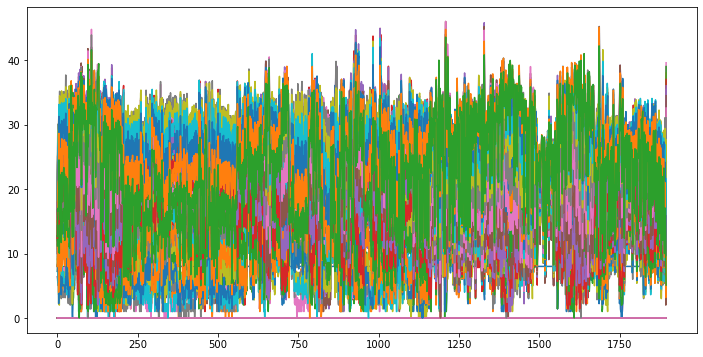

In [260]:
plt.figure(figsize=(12,6))
for i in range(63):
    plt.plot(df.iloc[:,1+i])
plt.show()

### Hampel Filter


In [263]:
# pip install hampel
from hampel import hampel


plt.figure(figsize=(12,6))
for i in range(5):
    print(df.iloc[:,1+i].to_list())
    print(hampel(df.iloc[:,1+i],5,2))
#     plt.plot(hampel(df.iloc[:,3+i],5,3))
# plt.show()

[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0,

<Figure size 864x432 with 0 Axes>

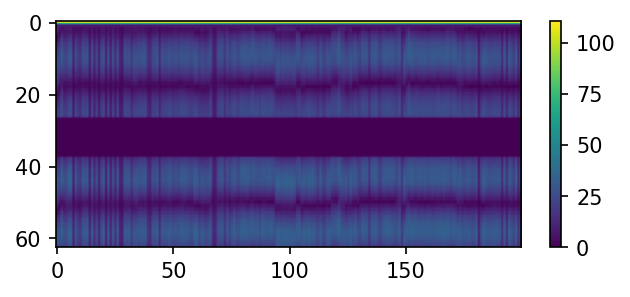

In [216]:
# Visualize Pilots signal
pilots=np.array([-21,-7,7,21])+32

plt.figure(figsize=(5,2),dpi=150)
plt.imshow(df.iloc[200:400,0:63].T, aspect='auto')
plt.colorbar()
plt.show()

In [217]:
import scipy.signal as signal
from sklearn import decomposition, preprocessing  
from mpl_toolkits.mplot3d import Axes3D  
import cv2
import matplotlib.pyplot as plt



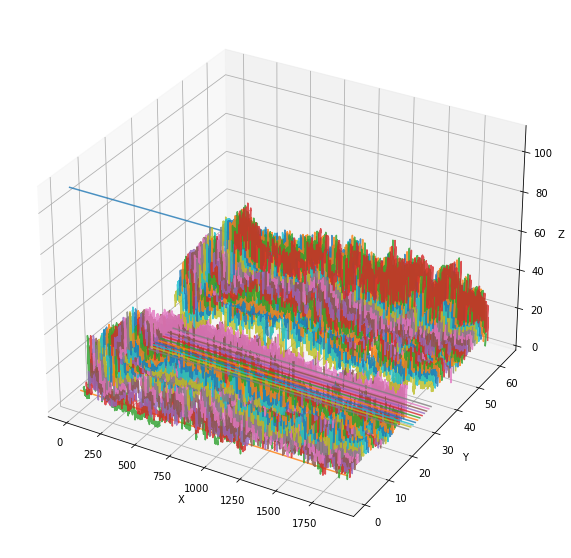

In [238]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')

# carriers = np.arange(64)
# len(carriers)
for c in range(64):
    # Generate the random data for the y=k 'layer'.
    xs = np.arange(len(df))
    ys = df.iloc[:,c].to_list()

    # # You can provide either a single color or an array with the same length as
    # # xs and ys. To demonstrate this, we color the first bar of each set cyan.
    # cs = [c] * len(xs)
    # cs[0] = 'c'

    # Plot the bar graph given by xs and ys on the plane y=k with 80% opacity.
    ax.plot(xs, ys, zs=c, zdir='y',  alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

### Model Creation